### Stock Market Prediction And Forecasting Using Stacked LSTM|

In [1]:
### Keras and Tensorflow >2.0

import numpy as np
import pandas as pd

In [2]:
pip install pandas_datareader


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [4]:
### Data Collection

import pandas_datareader.data as pdr
#pip install yfinance
import yfinance as yf
yf.pdr_override()

In [5]:
start='2010-01-01'
end= '2023-03-31'

df = pdr.get_data_yahoo('TSLA',start,end)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2023-03-24,191.649994,192.360001,187.149994,190.410004,190.410004,116531600
2023-03-27,194.419998,197.389999,189.940002,191.809998,191.809998,120851600
2023-03-28,192.000000,192.350006,185.429993,189.190002,189.190002,98654600


In [6]:
df1=df.reset_index()['Close']

In [7]:
data= df.filter(['Close'])
data

,Close
Date,
2010-06-29,1.592667
2010-06-30,1.588667
2010-07-01,1.464000
2010-07-02,1.280000
2010-07-06,1.074000
...,...
2023-03-24,190.410004
2023-03-27,191.809998
2023-03-28,189.190002


In [8]:
df1

0         1.592667
1         1.588667
2         1.464000
3         1.280000
4         1.074000
           ...    
3206    190.410004
3207    191.809998
3208    189.190002
3209    193.880005
3210    195.279999
Name: Close, Length: 3211, dtype: float64

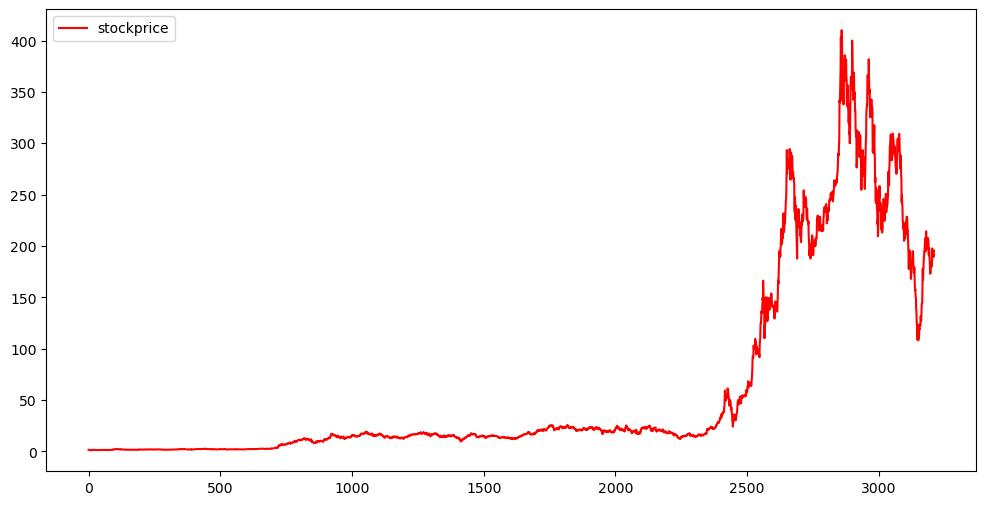

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(df1,'r',label='stockprice')
plt.legend()
plt.show()

In [10]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [11]:
df1

0         1.592667
1         1.588667
2         1.464000
3         1.280000
4         1.074000
           ...    
3206    190.410004
3207    191.809998
3208    189.190002
3209    193.880005
3210    195.279999
Name: Close, Length: 3211, dtype: float64

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
print(df1)

[[0.00131893]
 [0.00130915]
 [0.00100428]
 ...
 [0.4600856 ]
 [0.47155493]
 [0.4749786 ]]


In [14]:
int(len(df1)*0.65)

2087

In [15]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size,test_size

(2087, 1124)

In [17]:
train_data

array([[0.00131893],
       [0.00130915],
       [0.00100428],
       ...,
       [0.03827349],
       [0.04026901],
       [0.03930385]])

In [18]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [19]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:
X_test

array([[0.03854575, 0.03961362, 0.03974567, ..., 0.04250907, 0.04246016,
        0.04251722],
       [0.03961362, 0.03974567, 0.04251722, ..., 0.04246016, 0.04251722,
        0.04374812],
       [0.03974567, 0.04251722, 0.04173304, ..., 0.04251722, 0.04374812,
        0.04485348],
       ...,
       [0.55386996, 0.55455473, 0.52315467, ..., 0.46487873, 0.46749542,
        0.46306909],
       [0.55455473, 0.52315467, 0.52396168, ..., 0.46749542, 0.46306909,
        0.46649276],
       [0.52315467, 0.52396168, 0.50478908, ..., 0.46306909, 0.46649276,
        0.4600856 ]])

In [21]:
print(X_train.shape), print(y_train.shape)

(1986, 100)
(1986,)


(None, None)

In [22]:
print(X_test.shape), print(ytest.shape)

(1023, 100)
(1023,)


(None, None)

In [23]:
len(ytest)

1023

In [24]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [25]:
X_test

array([[[0.03854575],
        [0.03961362],
        [0.03974567],
        ...,
        [0.04250907],
        [0.04246016],
        [0.04251722]],

       [[0.03961362],
        [0.03974567],
        [0.04251722],
        ...,
        [0.04246016],
        [0.04251722],
        [0.04374812]],

       [[0.03974567],
        [0.04251722],
        [0.04173304],
        ...,
        [0.04251722],
        [0.04374812],
        [0.04485348]],

       ...,

       [[0.55386996],
        [0.55455473],
        [0.52315467],
        ...,
        [0.46487873],
        [0.46749542],
        [0.46306909]],

       [[0.55455473],
        [0.52315467],
        [0.52396168],
        ...,
        [0.46749542],
        [0.46306909],
        [0.46649276]],

       [[0.52315467],
        [0.52396168],
        [0.50478908],
        ...,
        [0.46306909],
        [0.46649276],
        [0.4600856 ]]])

In [26]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [27]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

2023-04-20 08:45:24.265243: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-20 08:45:24.335379: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-20 08:45:24.336849: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-20 08:45:25.382101: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [28]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
#compilig
model.compile(loss='mean_squared_error',optimizer='adam')

#trai model
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=1,batch_size=1)

2023-04-20 08:45:26.556179: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-20 08:45:26.558472: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-20 08:45:26.559856: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1986/1986 [==============================] - ETA: 0s - loss: 2.5787e-05

2023-04-20 08:47:02.158649: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-20 08:47:02.161211: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-20 08:47:02.162765: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1986/1986 [==============================] - 112s 55ms/step - loss: 2.5787e-05 - val_loss: 0.0013


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 128)          66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [30]:
import tensorflow as tf

In [31]:
tf.__version__

'2.12.0'

In [32]:
### Lets Do the prediction and check performance metrics
test_predict=model.predict(X_test)
train_predict=model.predict(X_train)

2023-04-20 08:47:19.172977: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-20 08:47:19.175014: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-20 08:47:19.176589: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

63/63 [==============================] - 4s 60ms/step


In [33]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [34]:
len(test_predict)

1023

In [35]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
rmse= np.sqrt(np.mean(((test_predict-ytest)**2)))
rmse

192.02812526636146

In [36]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

191.87757539177338

/tmp/ipykernel_5486/1671767707.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction']= test_predict


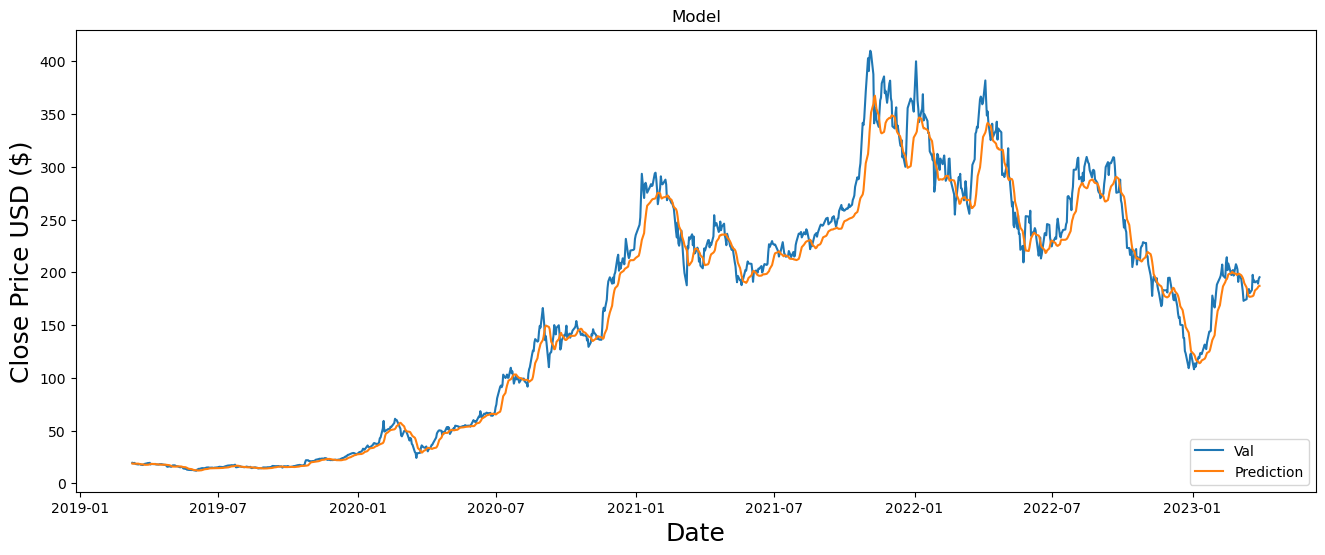

In [37]:
train= data[:training_size]
valid= data[(training_size+100+1):]

valid['Prediction']= test_predict

#visualize

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
#plt.plot(train['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend([ 'Val', 'Prediction'], loc='lower right')
plt.show()

In [38]:
valid[['Prediction','Close']]

,Prediction,Close
Date,,
2019-03-11,18.788946,19.394667
2019-03-12,18.612305,18.890667
2019-03-13,18.587559,19.264000
2019-03-14,18.567619,19.330667
2019-03-15,18.605364,18.362000
...,...,...
2023-03-24,182.776566,190.410004
2023-03-27,184.688782,191.809998
2023-03-28,185.922592,189.190002


In [39]:
"""
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
#testPredictPlot['Close']= data['Close']
# plot baseline and predictions
plt.figure(figsize=(12,6))
plt.plot(scaler.inverse_transform(df1),'r',label='original')
plt.plot(trainPredictPlot,'b',label='train data')
plt.plot(testPredictPlot,'g',label= 'test data')

plt.legend()
plt.show() """

"\n### Plotting \n# shift train predictions for plotting\nlook_back=100\ntrainPredictPlot = numpy.empty_like(df1)\ntrainPredictPlot[:, :] = np.nan\ntrainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict\n# shift test predictions for plotting\ntestPredictPlot = numpy.empty_like(df1)\ntestPredictPlot[:, :] = numpy.nan\ntestPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict\n#testPredictPlot['Close']= data['Close']\n# plot baseline and predictions\nplt.figure(figsize=(12,6))\nplt.plot(scaler.inverse_transform(df1),'r',label='original')\nplt.plot(trainPredictPlot,'b',label='train data')\nplt.plot(testPredictPlot,'g',label= 'test data')\n\nplt.legend()\nplt.show() "

In [40]:
#model.save('my_model.h5') 

In [41]:
len(test_data)

1124

In [48]:
x_input=test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape


(1, 100)

In [49]:
len(test_data)

1124

In [50]:
x_input

array([[0.50478908, 0.47938048, 0.46524557, 0.43171794, 0.46382719,
        0.47666599, 0.46438964, 0.47287548, 0.45453433, 0.44536376,
        0.43807622, 0.40794782, 0.41293663, 0.44543712, 0.44460567,
        0.44475239, 0.43964133, 0.47356021, 0.47356021, 0.4739515 ,
        0.44360301, 0.4371714 , 0.42303646, 0.42156919, 0.43528837,
        0.40782557, 0.39102506, 0.38087631, 0.38300387, 0.36480944,
        0.36392907, 0.33441207, 0.33384962, 0.30396576, 0.2985857 ,
        0.26422661, 0.27305482, 0.2953332 , 0.29865906, 0.26178113,
        0.27532912, 0.26725901, 0.27391073, 0.29031994, 0.2880701 ,
        0.29875688, 0.29958834, 0.29675158, 0.31898106, 0.31235378,
        0.30841654, 0.32370083, 0.34896271, 0.34930507, 0.35062562,
        0.38936215, 0.43247604, 0.4049888 , 0.42103118, 0.44105972,
        0.45783575, 0.46201751, 0.47370693, 0.47872019, 0.48967596,
        0.50442227, 0.47891583, 0.47341349, 0.50914204, 0.52134503,
        0.49151007, 0.50684328, 0.48008965, 0.48

In [51]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [52]:
len(temp_input)

100

In [53]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.45844537]
101
1 day input [0.47938048 0.46524557 0.43171794 0.46382719 0.47666599 0.46438964
 0.47287548 0.45453433 0.44536376 0.43807622 0.40794782 0.41293663
 0.44543712 0.44460567 0.44475239 0.43964133 0.47356021 0.47356021
 0.4739515  0.44360301 0.4371714  0.42303646 0.42156919 0.43528837
 0.40782557 0.39102506 0.38087631 0.38300387 0.36480944 0.36392907
 0.33441207 0.33384962 0.30396576 0.2985857  0.26422661 0.27305482
 0.2953332  0.29865906 0.26178113 0.27532912 0.26725901 0.27391073
 0.29031994 0.2880701  0.29875688 0.29958834 0.29675158 0.31898106
 0.31235378 0.30841654 0.32370083 0.34896271 0.34930507 0.35062562
 0.38936215 0.43247604 0.4049888  0.42103118 0.44105972 0.45783575
 0.46201751 0.47370693 0.47872019 0.48967596 0.50442227 0.47891583
 0.47341349 0.50914204 0.52134503 0.49151007 0.50684328 0.48008965
 0.48862441 0.49158347 0.47889139 0.50518037 0.50048504 0.4932953
 0.46426736 0.48111675 0.47138373 0.45646629 0.44250255 0.42029753
 0.42156919 0.42411248 0.44558385 

In [54]:
x_input.shape

(1, 100, 1)

In [55]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [56]:
len(df1)

3211

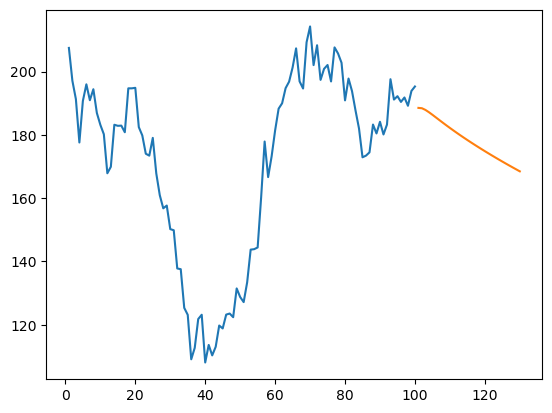

In [58]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

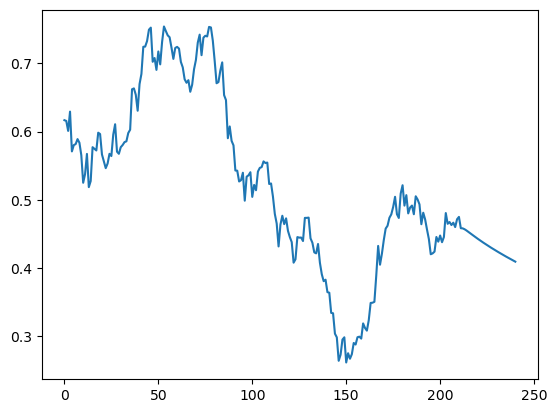

In [59]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[3000:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

In [ ]:
plt.plot(df3)